In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy.optimize import curve_fit

data = pd.read_csv('../Prepared_Data/data.csv')

In [21]:
##### Set the Plot Sheme #####
import tueplots
from tueplots import bundles

# this provides the color palette of Uni Tuebingen
from tueplots.constants.color import rgb
# e.g. as rgb.tue_blue, rgb.tue_red, etc.

# set plotting stylesheet
plt.rcParams.update(bundles.icml2022(column='full', nrows=1, ncols=2, usetex=False))

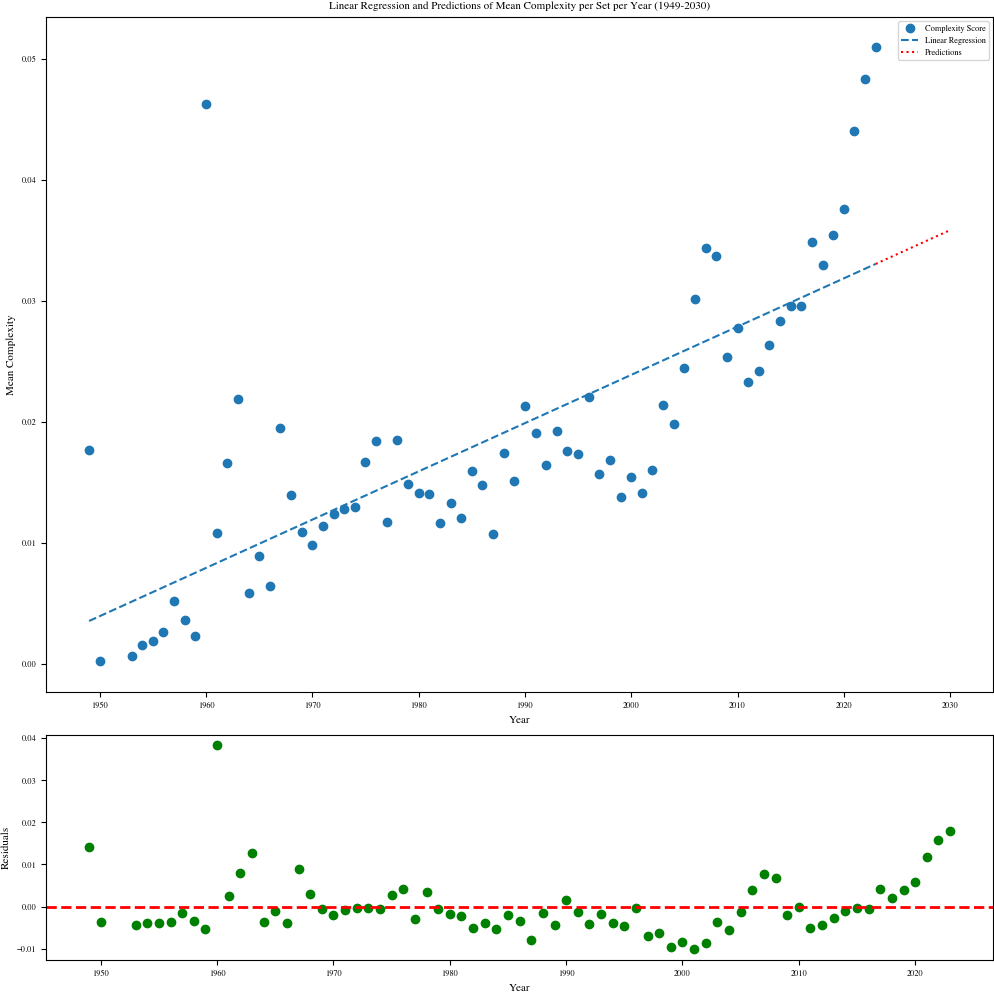

In [22]:
##### Plot mean complexity per set per year and a prediction until 2030#####

def linear_regression_complexity(df):
    
    mean_complexity_per_set_per_year = df.groupby('year')['complexity_score'].mean().reset_index(name='complexity_score')

    # create the plot
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [3, 1]})

    x = mean_complexity_per_set_per_year['year'].values.reshape(-1, 1)
    y = mean_complexity_per_set_per_year['complexity_score'].values
    model = LinearRegression().fit(x, y)
    y_pred = model.predict(x)

    # plot the original data
    ax1.scatter(x, y, label='Complexity Score')
    ax1.plot(x, y_pred, linestyle='--', label='Linear Regression')

    # make predictions until 2030
    x_future = np.arange(2023, 2031).reshape(-1, 1)
    y_future_pred = model.predict(x_future)
    ax1.plot(x_future, y_future_pred, linestyle=':', color='red', label='Predictions')

    # add title and labels
    ax1.set_title('Linear Regression and Predictions of Mean Complexity per Set per Year (1949-2030)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Mean Complexity')
    ax1.legend()

    # plot residuals
    residuals = y - y_pred
    ax2.scatter(x, residuals, color='green')
    ax2.axhline(y=0, color='red', linestyle='--', linewidth=2)
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Residuals')

    # save plot
    plt.savefig('Linear_Regression.pdf')
    
    # show the plot
    plt.show()

# call the function
linear_regression_complexity(data)


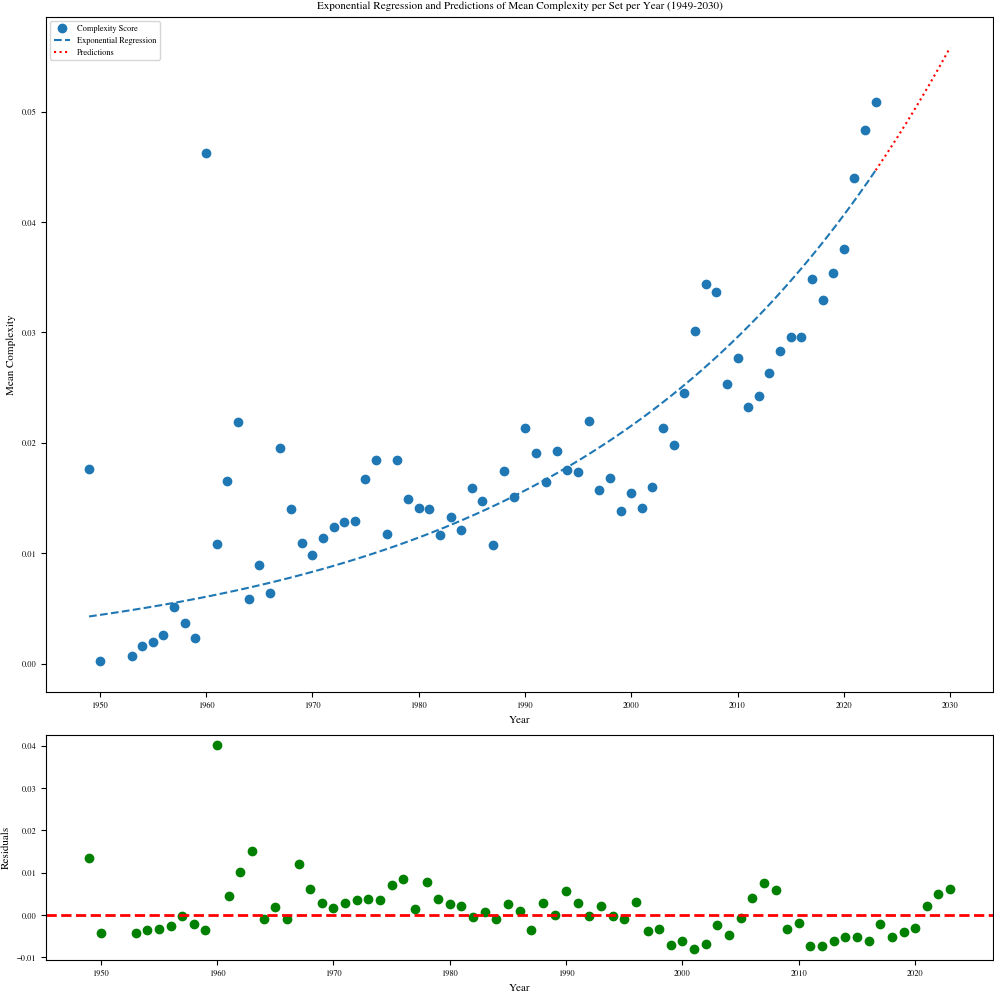

In [23]:
##### Make an exponential Regression #####

def exponential_regression_complexity(df):
    
    mean_complexity_per_set_per_year = df.groupby('year')['complexity_score'].mean().reset_index(name='complexity_score')

    # create the plot
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [3, 1]})

    x = mean_complexity_per_set_per_year['year'].values
    y = mean_complexity_per_set_per_year['complexity_score'].values

    # perform exponential regression using np.polyfit on the logarithm of the data
    log_y = np.log(y)
    coefficients = np.polyfit(x, log_y, 1)
    a, b = coefficients

    # plot the original data
    ax1.scatter(x, y, label='Complexity Score')

    # plot the fitted exponential curve
    x_fit = np.linspace(min(x), max(x), 100)
    y_fit = np.exp(a * x_fit + b)
    ax1.plot(x_fit, y_fit, linestyle='--', label='Exponential Regression')

    # make predictions until 2030
    x_future = np.arange(2023, 2031)
    y_future_pred = np.exp(a * x_future + b)
    ax1.plot(x_future, y_future_pred, linestyle=':', color='red', label='Predictions')

    # add title and labels
    ax1.set_title('Exponential Regression and Predictions of Mean Complexity per Set per Year (1949-2030)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Mean Complexity')
    ax1.legend()

    # plot residuals
    residuals = y - np.exp(a * x + b)
    ax2.scatter(x, residuals, color='green')
    ax2.axhline(y=0, color='red', linestyle='--', linewidth=2)
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Residuals')

    # save plot
    plt.savefig('Exponential_Regression.pdf')

    # show the plot
    plt.show()

# call the function
exponential_regression_complexity(data)


SSR Linear Regression: 0.0038570428111682374, SSR Exponential Regression: 0.0035040207169696395
R^2 Linear Regression: 0.5742158703461817, R^2 Exponential Regression: 0.6131864528586923


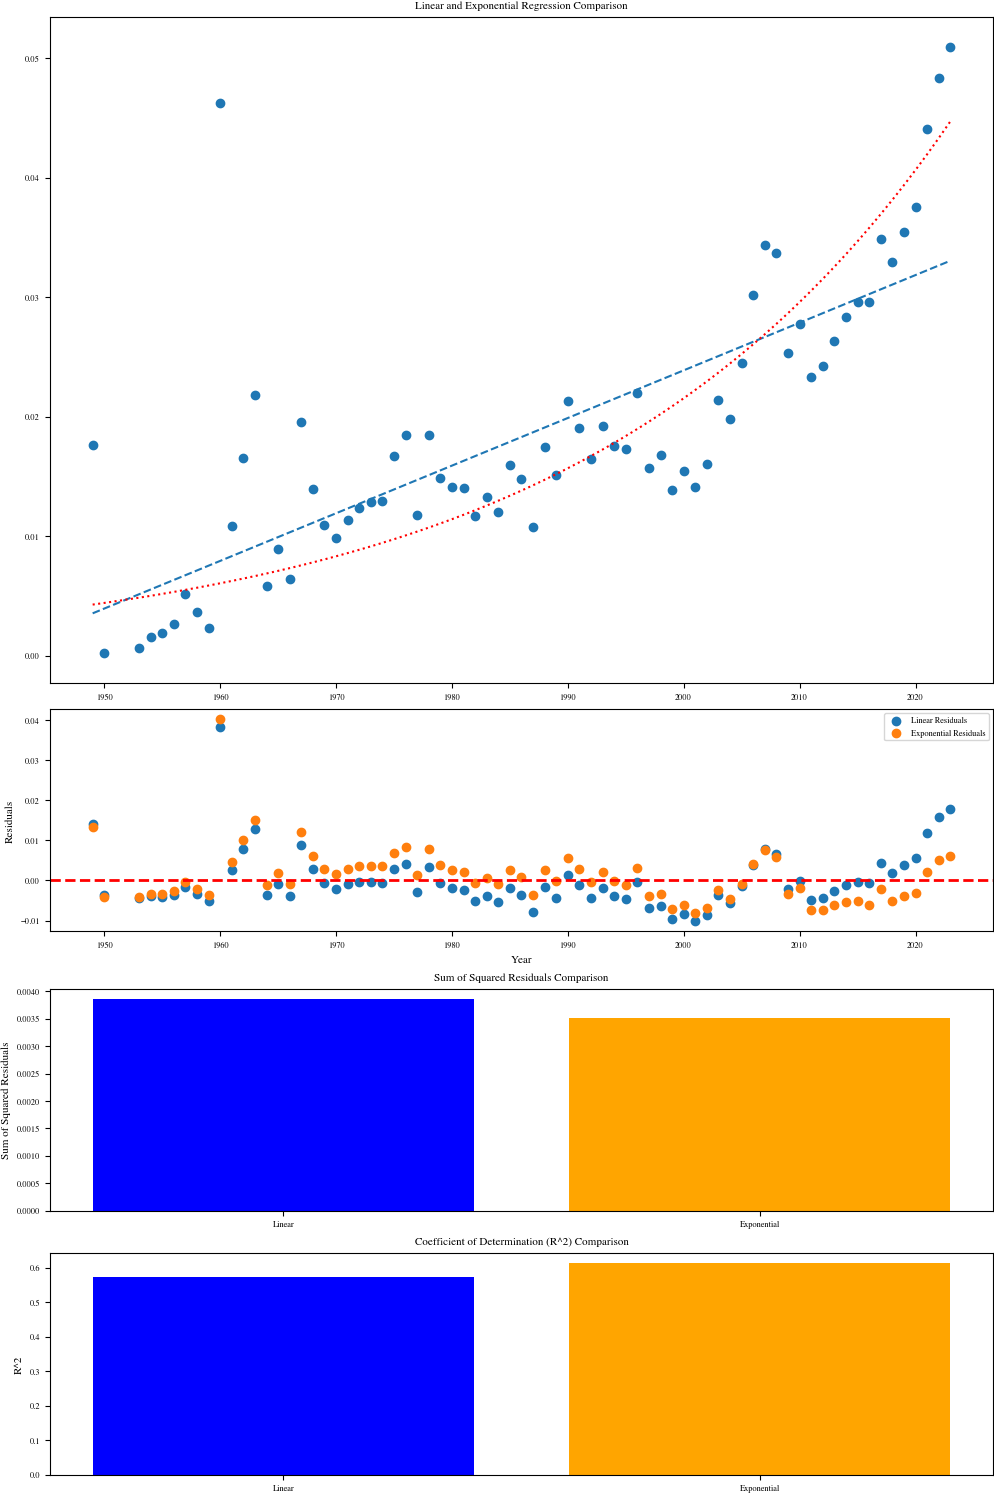

In [24]:
##### Compare the regressions #####

def compare_regression_complexity(df):
    
    mean_complexity_per_set_per_year = df.groupby('year')['complexity_score'].mean().reset_index(name='complexity_score')

    # create the plot
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 15), gridspec_kw={'height_ratios': [3, 1, 1, 1]})

    x = mean_complexity_per_set_per_year['year'].values.reshape(-1, 1)
    y = mean_complexity_per_set_per_year['complexity_score'].values

    # linear Regression
    model_linear = LinearRegression().fit(x, y)
    y_pred_linear = model_linear.predict(x)

    # exponential Regression
    log_y = np.log(y)
    coefficients_exp = np.polyfit(x.flatten(), log_y, 1)
    a_exp, b_exp = coefficients_exp
    y_pred_exp = np.exp(a_exp * x.flatten() + b_exp)

    # residuals
    residuals_linear = y - y_pred_linear
    residuals_exp = y - y_pred_exp

    # plot the original data
    ax1.scatter(x, y, label='Complexity Score')

    # plot Linear Regression
    ax1.plot(x, y_pred_linear, linestyle='--', label='Linear Regression')
    ax1.set_title('Linear and Exponential Regression Comparison')

    # plot Exponential Regression
    ax1.plot(x, y_pred_exp, linestyle=':', color='red', label='Exponential Regression')

    # residual Plots
    ax2.scatter(x, residuals_linear, label='Linear Residuals')
    ax2.scatter(x, residuals_exp, label='Exponential Residuals')
    ax2.axhline(y=0, color='red', linestyle='--', linewidth=2)
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Residuals')
    ax2.legend()

    # Sum of Squared Residuals
    sum_squared_residuals_linear = np.sum(residuals_linear ** 2)
    sum_squared_residuals_exp = np.sum(residuals_exp ** 2)

    # Coefficient of Determination (R^2)
    r2_linear = model_linear.score(x, y)
    r2_exp = 1 - (np.sum(residuals_exp ** 2) / np.sum((y - np.mean(y)) ** 2))

    # Display results
    ax3.bar(['Linear', 'Exponential'], [sum_squared_residuals_linear, sum_squared_residuals_exp], color=['blue', 'orange'])
    ax3.set_title('Sum of Squared Residuals Comparison')
    ax3.set_ylabel('Sum of Squared Residuals')

    ax4.bar(['Linear', 'Exponential'], [r2_linear, r2_exp], color=['blue', 'orange'])
    ax4.set_title('Coefficient of Determination (R^2) Comparison')
    ax4.set_ylabel('R^2')

    # print information
    print(f'SSR Linear Regression: {sum_squared_residuals_linear}, SSR Exponential Regression: {sum_squared_residuals_exp}')
    print(f'R^2 Linear Regression: {r2_linear}, R^2 Exponential Regression: {r2_exp}')

    # save plot
    plt.savefig('Regression_Comparison.pdf')

    plt.show()

# call the function
compare_regression_complexity(data)


* R^2 (provides a measure of how well the model explains the variance in the dependent variable, higher R^2 indicates a better fit) --> should be high
* Sum of Squared (Lower sum of squared residuals is usually preferable, as it indicates a better fit to the data) --> should be low 
+ --> exponential regression is better